## Regression

In [1]:
from sklearn.datasets import make_regression
from kiwigrad import MLP, Layer, Value
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline

### Dataset

In [2]:
X, y = make_regression(n_samples=200, n_features=5, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0:5])

(200, 5)
(200,)
[0.95927083 0.02451017 0.49799829 1.45114361 2.15318246]
[172.54436082 -52.9529574   -4.14935233 193.99958991 -66.96262773]


In [3]:
inputs = [[Value(i) for i in elem] for elem in X]
inputs[0]

[Value(data=0.959271, grad=0.000000),
 Value(data=0.024510, grad=0.000000),
 Value(data=0.497998, grad=0.000000),
 Value(data=1.451144, grad=0.000000),
 Value(data=2.153182, grad=0.000000)]

### Multi layer perceptron

In [4]:
class PotNet(MLP):
    def __init__(self):
        layers = [
            Layer(nin=5, nout=16, bias=True, activation="relu"),
            Layer(nin=16, nout=16, bias=True, activation="relu"),
            Layer(nin=16, nout=1, bias=True, activation="linear")
        ]
        super().__init__(layers=layers)

model = PotNet()
y_pred = model(inputs[0])
print(y_pred)

Value(data=-2.243560, grad=0.000000)


### Full batch gradient descent with squared error loss

Squared error (squared L2 norm):

$$ l(x,y) = L = (\hat{y}_i - y_i)^2$$



In [5]:
epochs = 100
for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for i in range(len(inputs)):
        output = model(inputs[i])
        y_pred.append(output.data)
        target = Value(y[i])
        loss = (output - target) ** 2
        losses.append(loss.data)
        #loss = (output - target) * (output - target)
        loss.backward()
        for p in model.parameters():
            p.data += -0.00001 * p.grad
        model.zero_grad()
    e = time.monotonic()
    t = e - s
    loss_epoch = sum(losses) / len(losses)
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"epoch: {epoch} | loss: {loss_epoch:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")

epoch: 0 | loss: 8976.85 | R2: 0.02 | time: 0.07 sec.
epoch: 10 | loss: 83.42 | R2: 0.99 | time: 0.06 sec.
epoch: 20 | loss: 31.00 | R2: 1.00 | time: 0.07 sec.
epoch: 30 | loss: 16.73 | R2: 1.00 | time: 0.06 sec.
epoch: 40 | loss: 10.85 | R2: 1.00 | time: 0.07 sec.
epoch: 50 | loss: 7.60 | R2: 1.00 | time: 0.07 sec.
epoch: 60 | loss: 5.67 | R2: 1.00 | time: 0.07 sec.
epoch: 70 | loss: 4.50 | R2: 1.00 | time: 0.07 sec.
epoch: 80 | loss: 3.73 | R2: 1.00 | time: 0.07 sec.
epoch: 90 | loss: 3.18 | R2: 1.00 | time: 0.08 sec.
epoch: 99 | loss: 2.80 | R2: 1.00 | time: 0.08 sec.


### Result

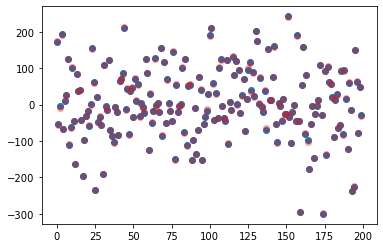

In [6]:
x = [i for i in range(len(inputs))]
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()

### Save & load the trainend model 

In [7]:
model.save()

In [8]:
new_model = PotNet()
new_model.load(path="weights.pkl")
idx = 0
new_y_pred = new_model(inputs[idx])
print(f"y_pred: {new_y_pred.data:.2f}, y_true: {y[idx]:.2f}")

y_pred: 173.50, y_true: 172.54


## Real Data

In [9]:
X = pd.read_csv("data/x.csv", sep=";")
print(X.shape)
X.head()

(414, 6)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [10]:
Xn = X.to_numpy().tolist()
inputs = [[Value(i) for i in elem] for elem in Xn]
inputs[0]

[Value(data=-0.823683, grad=0.000000),
 Value(data=1.255628, grad=0.000000),
 Value(data=-0.792495, grad=0.000000),
 Value(data=2.007407, grad=0.000000),
 Value(data=1.125430, grad=0.000000),
 Value(data=0.448762, grad=0.000000)]

In [11]:
y = pd.read_csv("data/y.csv", sep=";")
y = y.to_numpy().squeeze()
print(y.shape)

(414,)


In [12]:
class PotNet(MLP):
    def __init__(self):
        layers = [
            Layer(nin=6, nout=16, bias=True, activation="relu"),
            Layer(nin=16, nout=1, bias=True, activation="linear")
        ]
        super().__init__(layers=layers)

model = PotNet()
y_pred = model(inputs[0])
print(y_pred)

Value(data=1.825113, grad=0.000000)


In [13]:
epochs = 200
for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for i in range(len(inputs)):
        output = model(inputs[i])
        y_pred.append(output.data)
        target = Value(y[i])
        loss = (output - target) ** 2
        losses.append(loss.data)
        #loss = (output - target) * (output - target)
        loss.backward()
        for p in model.parameters():
            p.data += -0.00001 * p.grad
        model.zero_grad()
    e = time.monotonic()
    t = e - s
    loss_epoch = sum(losses) / len(losses)
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"epoch: {epoch} | loss: {loss_epoch:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")

epoch: 0 | loss: 1336.74 | R2: -6.24 | time: 0.07 sec.
epoch: 10 | loss: 93.49 | R2: 0.49 | time: 0.05 sec.
epoch: 20 | loss: 69.42 | R2: 0.62 | time: 0.05 sec.
epoch: 30 | loss: 63.63 | R2: 0.66 | time: 0.05 sec.
epoch: 40 | loss: 60.86 | R2: 0.67 | time: 0.05 sec.
epoch: 50 | loss: 59.34 | R2: 0.68 | time: 0.05 sec.
epoch: 60 | loss: 58.45 | R2: 0.68 | time: 0.05 sec.
epoch: 70 | loss: 57.89 | R2: 0.69 | time: 0.05 sec.
epoch: 80 | loss: 57.46 | R2: 0.69 | time: 0.05 sec.
epoch: 90 | loss: 57.11 | R2: 0.69 | time: 0.05 sec.
epoch: 100 | loss: 56.84 | R2: 0.69 | time: 0.05 sec.
epoch: 110 | loss: 56.61 | R2: 0.69 | time: 0.05 sec.
epoch: 120 | loss: 56.42 | R2: 0.69 | time: 0.05 sec.
epoch: 130 | loss: 56.23 | R2: 0.70 | time: 0.05 sec.
epoch: 140 | loss: 56.06 | R2: 0.70 | time: 0.05 sec.
epoch: 150 | loss: 55.88 | R2: 0.70 | time: 0.05 sec.
epoch: 160 | loss: 55.72 | R2: 0.70 | time: 0.05 sec.
epoch: 170 | loss: 55.57 | R2: 0.70 | time: 0.05 sec.
epoch: 180 | loss: 55.43 | R2: 0.70 

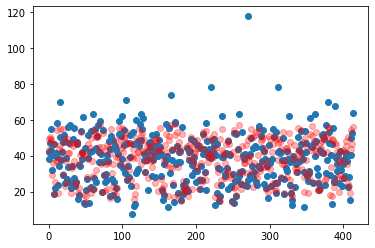

In [14]:
x = [i for i in range(len(inputs))]
# y true
plt.scatter(x, y)
# y pred
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()